In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
# Import train and test split\
from sklearn.model_selection import train_test_split

# Improt preprocessing module
from sklearn import preprocessing

# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import cross-validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Import metrics for model performance
from sklearn.metrics import mean_squared_error, r2_score

# Import module for storing arrays
import joblib

from sklearn.neighbors import KNeighborsClassifier

from scipy import stats as ss

import collections as co

# Specials.
import scipy.special as spec


***

# Section 1: SciKit-Learn Overview

<br>

## 1.1. Introduction

<br>

Scikit-learn, or 'Sklearn', is an open source and commercially usable machine learning library within Python. The library is built upon Numpy and SciPy to carry out a variety of essential machine learning processes. 

The type of machine learning carried out by Sklearn is broadly separated into two categories: **supervised machine learning** and **unsupervised machine learning**.

<br>

***

## 1.2.Supervised Machine Learning

In Supervised Machine Learning, or 'SML', the data being used is labeled. There is an input variable, 'X', and an output variable, 'Y', and you use an algorithm to learn the mapping from the output to the input. 

The data scientist oversees the algorithms that are used in SML by creating a model. The data is split into training and testing data and using this trained data, the model is 'supervised'. Essentially, the model iteratively learns to carry out accurate predictions or classifications. The algorithm eventually reaches an acceptable level of accuracy. The data scientist oversees this process, and using a number of tools (helper functions within Sklearn for example), decides if the model that has learned from the trained data is accurate,

Specific algorithms are utilised on this labeled data, different to those that we could use on unlabelled. 

#### Reference: https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning

#### References: https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/

<br>

***

## 1.3. Unsupervised Machine Learning

In Unsupervised Machine Learning ('UML'), there is an input variable, 'X', but no output variables. We much instead rely upon Sklearn algorithms that can investigate the existing data and derive learnings from this alone, by investigating patterns existing in the data.

UML can be generally sub-divided into two problem solving methods: **clusering** and **Association**. 

In clustering, algorithms are used to study patterns that suggest there are groups within the unlabelled data. In this case, the algorithm looks groups of datapoints that are clustered according to some variables. An example application of clustering is in *churn prediction*, where a company may want to study the period of time it takes subscribers to unsubscribe. 

Association is where algorithms look at data and learn patterns that describe large portions of data. For example, people who unsubscribe from a service within the first month, also tended to not have received email prompts offering discounts. This is not investigating the data as being comprised of identifiable clusters, but rather as having an overall trend that can be of value. 

<br>

***

## 1.4. Sklearn Problems

Sklearn is broadly separated into 6 areas of Machine Learning:

1. Classification
2. Regression
3. Preprocessing
4. Clustering
5. Model Selection
6. Dimensionality Reduction

**Classification** and **Regression** are Supervised Machine Learning problems.

**Clustering** and **Dimensionality Reduction** are Unsupervised problems. 

**Preprocessing** and **Model Selection** are processes that can be applied to both SML and UML problems.

It is important to get an understanding of each of these algorithms and how they work.

<br>

### 1. Classification

Classification is a SML problem that involves investigating data and identifying which category it belongs to. 

Take for example the Diet dataset that we will look at in the Scipy.Stats notebook. This contains an independent variable, 'Diet' - which contains three categories, each one representing a different diet. It also contains a dependent variable, which is the weight change measured after 6 weeks on the diet. 

that is comprised of an independent variable and a dependent variable

In [21]:
df = pd.read_csv('diet_BMI_incl.csv')
Diet = df['Diet']
BMI = df['BMI_change']
#Gender = df['gender']
#Age = df['Age']
Height = df['Height']

c:\users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


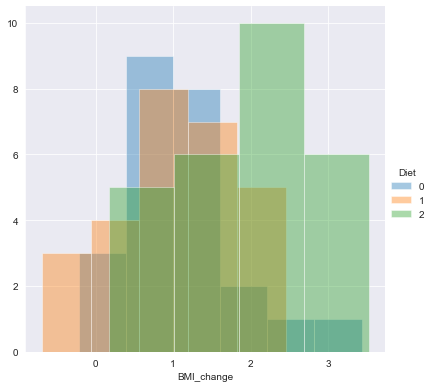

In [22]:
sns.FacetGrid(df,hue='Diet',height=5.5).map(sns.distplot,'BMI_change', kde=False).add_legend()
#sns.scatterplot(x=BMI, y=Diet, hue=Diet, data=df)

From the above plot we see the BMI histograms for the three diet groups. We notice that there is a large degree of overlap between diet 0 and diet 1. However, we notice that there appears to be a large degree of diet 2 vectors that is differentiated from the other two groups.

#### Classification Problem:

You are presented with a number of BMI_change datapoints, but are not told which category of diet they relate to. In this case you could use Classification algorithms to determine which diet the measurement relates to.

In this example you are given a measurement of 3% BMI_change. A Classification algorithm such as *K-nearest neighbor* (sklearn.neighbors.KNeighborsClassifier) in order to determine what diet was most likely. In this case, it would be necessary to use the KNN algorithm on bivariate data (by plotting Height by BMI_Change, for example).

We will look more at this type of algorithm later.

***

### 2. Regression

Regression is the second Supervised Machine Learning problem that Sklearn addresses. Regression is the measure of the mean of one value, the output, and the corresponding value of the other values.

Take for example the Powerproduction dataset. This data contains two features. The independent variable is 'speed' and the dependent variable is power.

#### Regression Problem

There is a desired to understand for each measure of Speed, what the corresponding Power measure will be.

By carrying out Polynomial regression on this dataset, we can draw a 'line of best fit' through the data. This is a line that fits through the spread of data vectors, whereby, the combined distance from each point to the line is at it's lowest. This is known as calculating the cost of the line.

Below, a mapping function containing SciPy's curve_fit() function shows the desired effect of Regression. This is for demonstration purposes only, as can be seen in the line between the measure of 'Speed' of 7 and 10, the line does not fit very well in this area. The regression that will take place later in this project will use trained data and will be more accurate.

In [23]:
df = pd.read_csv("powerproduction.txt")

In [24]:
from scipy.optimize import curve_fit


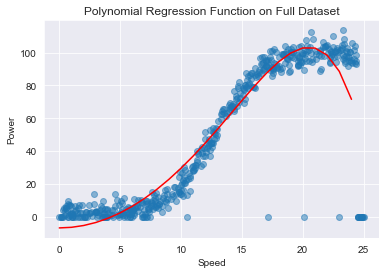

In [25]:
# define the basis function
def basis(x, a, b, c):
    return a * np.power(x, 7) + b * x**2 + c

# choose the input and output variables
x, y = df["speed"], df["power"]
# curve fit
exponents, _ = curve_fit(basis, x, y)
# summarize the parameter values
a, b, c = exponents

# plot inputs and outputs
plt.scatter(x, y, alpha=0.5)

# Use np.arange to inputs from smallest vector to largest
x_array = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_array = basis(x_array, a, b, c)
# create a line plot for the mapping function
plt.plot(x_array, y_array, color='red')
plt.title("Polynomial Regression Function on Full Dataset")
plt.xlabel("Speed")
plt.ylabel("Power")

plt.show()

***

### 3. Preprocessing

Sklearn doesn't automatically do any preprocessing because you won't have control over how to preprocess. Such as how to encode variables or how to compute data.

#### Preprocessing Problem

More often than not, before you build your model from the training labels and training data, you are taking extra steps in between such as feature extraction, scaling and feature selection - when these steps have been implemented, they are included in the model.

Cross-validation should happen on the whole processing pipeline, from feature extraction to feature selection



<img src="https://miro.medium.com/max/702/1*NfTkTp_35ylyDIdreYb9Sw.png" style="width: 650px;">

The image above lays out the main preproccesing steps. These can all be implemented in Sklearn. For example, imputation of NaN values, or scaling, where the data is spread out across a particular scale, which is very helpful if your data is sparse.

<br>

***

### 4. Clustering

<br>

Clustering "involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find natural groups or clusters in feature space" (Machine Learning Mastery: https://machinelearningmastery.com/clustering-algorithms-with-python/).

This is a form of UML where groups within the data are noted and inferences are made based on these patterns. 

#### Clustering Problem

Imagine that you are given a dataset without labels. By carrying out bivariate analysis using scatterplots specific clusters are noted.

You must now carry out Unsupervised Machine Learning to determine if these clusters is an appropriate way to distinguish between the groups.

<img src="https://miro.medium.com/max/1000/1*0DDt5Xp9z6ecj5eL6FNAfQ.png" style="width: 850px;"> 

Taking the above image of data groups, Sklearns clustering algorithms can be used to determine the most appropriate way to cluster.

<br>

***

### 5. Model Selection and Evaluation

Sklearn employs a number of functions within it's Model Selection module to help with testing classifiers and models.

#### Model Selection Problem

You have just created a model containing test and train data. You have carried out Simple Linear Regression but wish to determine if this is accurate and that the model is appropriate. This has given you a more robust estimate on the generalisation performance of your model.

You can use a number of helper functions within Sklearn to achieve this. These offer cross-validation to the data.

You can use cross_val_score() function to get an object, data and labels and input how much cross validation to use (3 fold, 5 fold etc). This function will return the scores on the 'holdout' set for each evaluation. For 5 folds, you will get 5 scores. You can then calculate the mean of the 5 scores. This is illustrated by the below image.

<img src="https://www.kdnuggets.com/wp-content/uploads/train_test_split.jpg" style="width: 850px;">

<br>

***

### 6. Dimensionality Reduction

The more random variables that are being included in a model, the more likely it is that it will be inaccurate. Sklearn has developed a means to reduce down the number of variables included.

Dimensionality Reduction is a section of Sklearn that allows one to whittle down to only the useful variables. 

#### Dimensionality Problem

In the image below, this concept is illustrated by comparing 1d, 2d, 3d and Nd data:

<img src="https://miro.medium.com/max/959/1*kK4aMPHQ89ssFEus6RT4Yw.jpeg" style="width: 650px;">

It is clear that it is easier and more accurate to recognise patterns in the data if it is reduced down to lower dimentionality.

In Sklearn the estimator.tranform() method can be used to achieve this.

<br>

<br>

***

<br>

# Section 2: Sklearn Algorithms: K-nearest Neighbor, RandomForest and  

<br>